In [5]:
!pip install pandas matplotlib seaborn


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the Data

In [7]:
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')


# Exploring the Data


In [8]:
print(deliveries.head())
print(matches.head())
print(deliveries.info())
print(matches.info())


   match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0

### Missing Values

We check for null values to clean and preprocess the data before analysis.


In [9]:
print(matches.isnull().sum())
print(deliveries.isnull().sum())


id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64


### Cleaning Matches

In the Matches dataset,filling the null values

In [11]:
matches['city'] = matches['city'].fillna('Unknown')
matches['player_of_match'] = matches['player_of_match'].fillna('None')
matches['winner'] = matches['winner'].fillna('None')
matches['result_margin'] = matches['result_margin'].fillna(0)
matches['target_runs'] = matches['target_runs'].fillna(0)
matches['target_overs'] = matches['target_overs'].fillna(0)
matches['method'] = matches['method'].fillna('Normal')


In [59]:
matches.isnull().sum()


id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

## Total Wins by Each Team (2008–2024)
This chart shows the total number of matches each team has won across all IPL seasons.


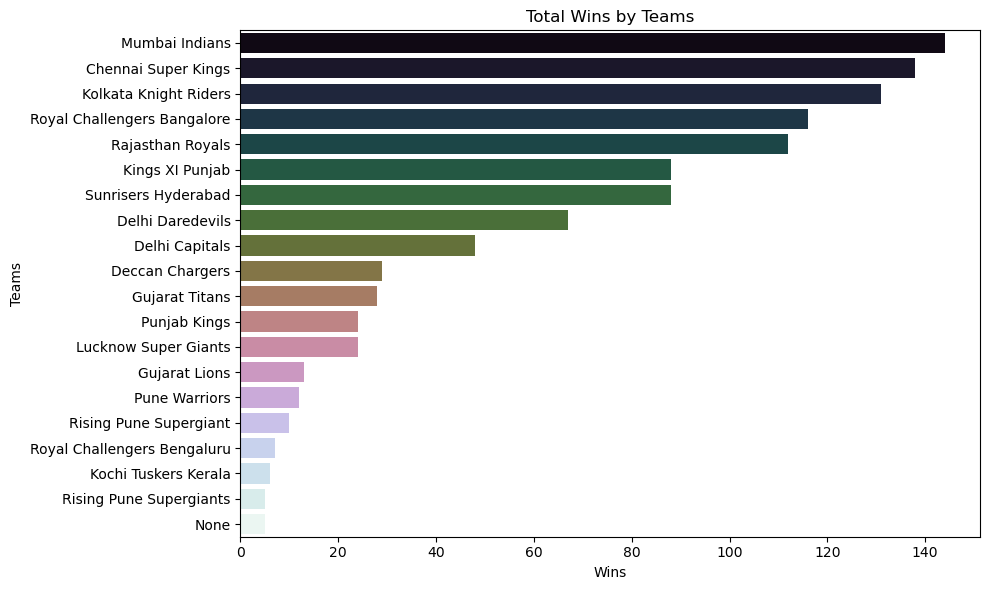

In [12]:

team_wins = matches['winner'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=team_wins.values, y=team_wins.index, palette='cubehelix')
plt.title('Total Wins by Teams')
plt.xlabel('Wins')
plt.ylabel('Teams')
plt.tight_layout()
plt.show()


## Team Performance Across Seasons
Below is a breakdown of how each team performed season by season.


In [21]:
team_season_wins = matches.groupby(['season', 'winner']).size().reset_index(name='wins')


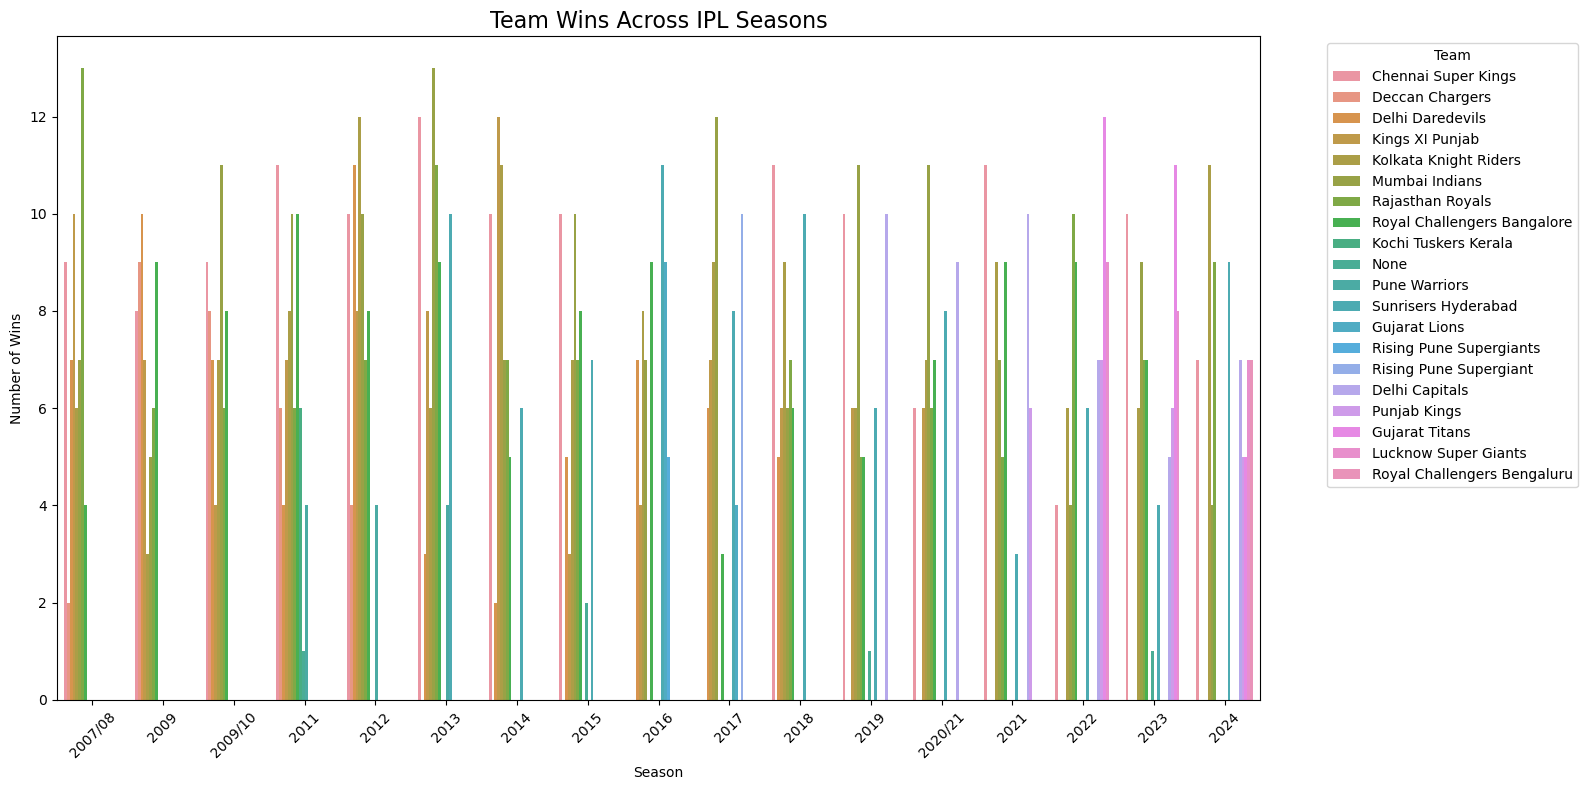

In [23]:
plt.figure(figsize=(16, 8))
sns.barplot(data=team_season_wins, x='season', y='wins', hue='winner')

plt.title('Team Wins Across IPL Seasons', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🧍‍♂️ Player Statistics and Rankings

### 🔹 Top Run Scorers
Shows players with highest total runs across IPL seasons.

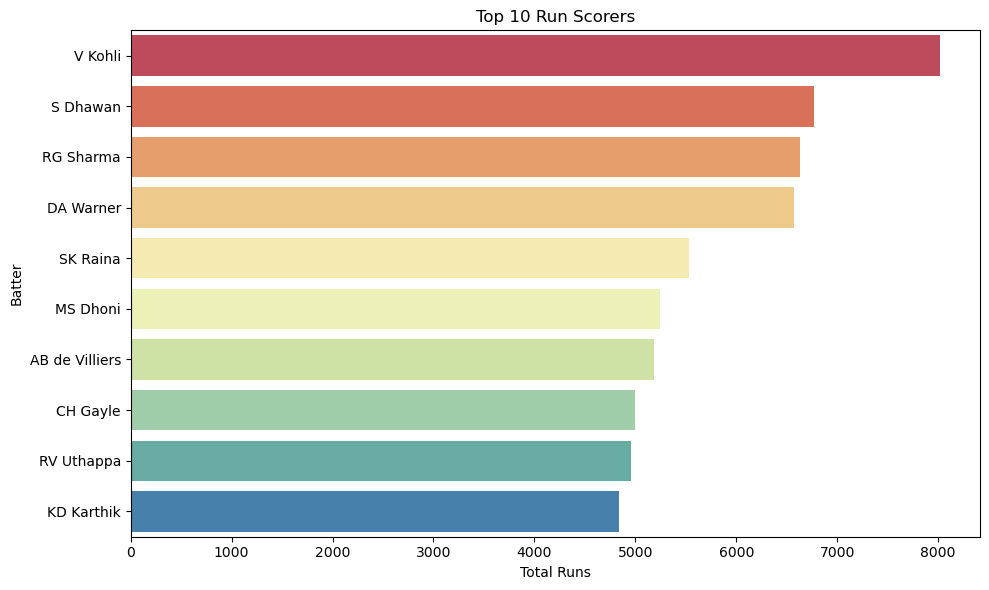

In [24]:
top_scorers = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_scorers.values, y=top_scorers.index, palette='Spectral')
plt.title('Top 10 Run Scorers')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.tight_layout()
plt.show()


### 🔹 Top Wicket Takers
Shows bowlers with most dismissals (excluding run outs).

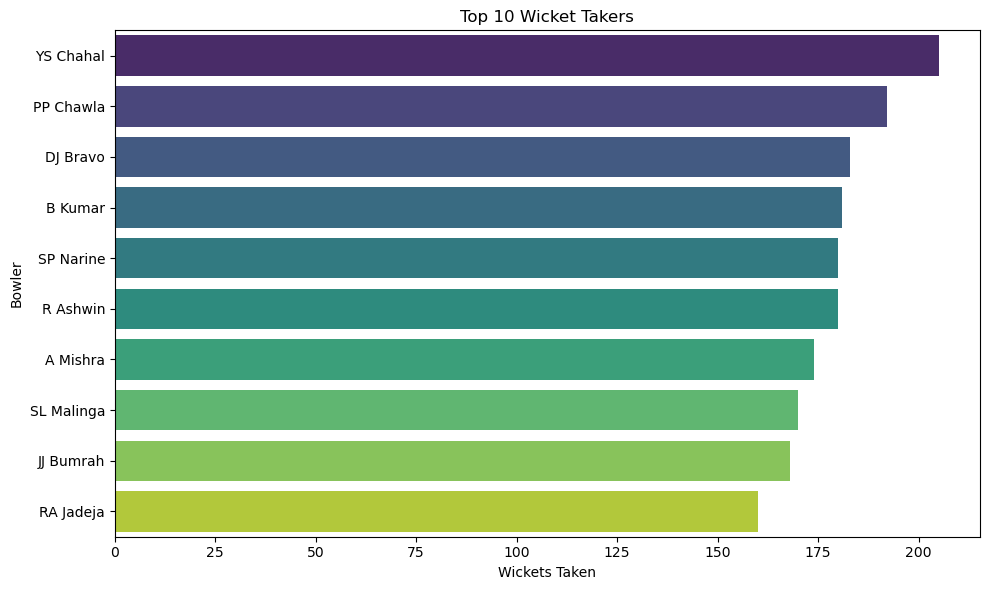

In [27]:

dismissal_kinds = ['bowled', 'caught', 'lbw', 'caught and bowled', 'stumped', 'hit wicket']
wickets = deliveries[deliveries['dismissal_kind'].isin(dismissal_kinds)]
top_bowlers = wickets['bowler'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='viridis')
plt.title('Top 10 Wicket Takers')
plt.xlabel('Wickets Taken')
plt.ylabel('Bowler')
plt.tight_layout()
plt.show()



### 🔹 Best Strike Rates
Players with highest strike rates (Min 200 balls faced to avoid bias).

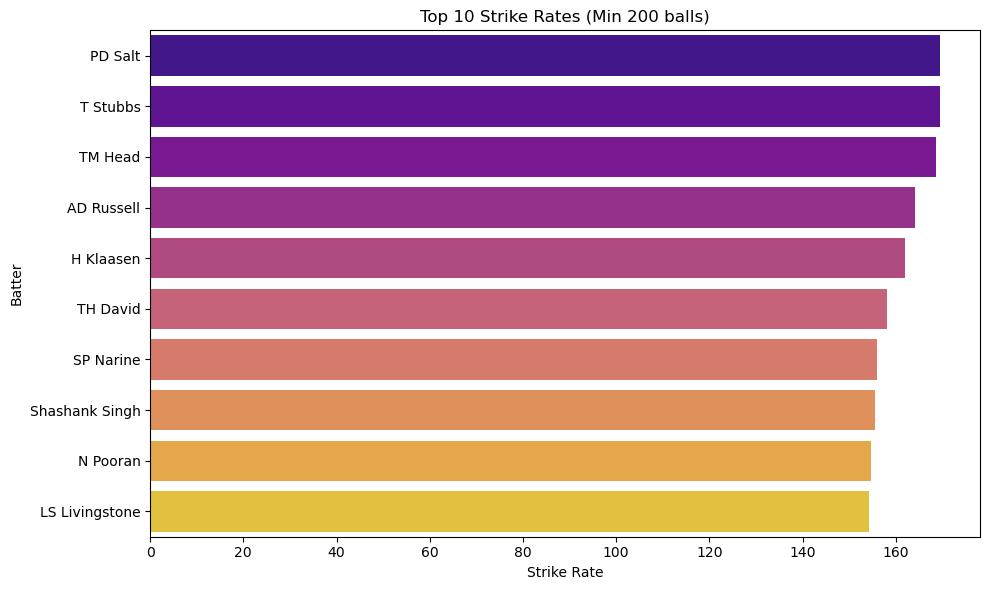

In [29]:
balls_faced = deliveries.groupby('batter').size()
runs_scored = deliveries.groupby('batter')['batsman_runs'].sum()
strike_rate = (runs_scored / balls_faced) * 100

# Filter players with at least 200 balls faced
strike_rate = strike_rate[balls_faced > 200].sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=strike_rate.values, y=strike_rate.index, palette='plasma')
plt.title('Top 10 Strike Rates (Min 200 balls)')
plt.xlabel('Strike Rate')
plt.ylabel('Batter')
plt.tight_layout()
plt.show()


### 🔹 All-Rounder Contributions
A custom score combining both batting and bowling stats to rank top all-rounders.

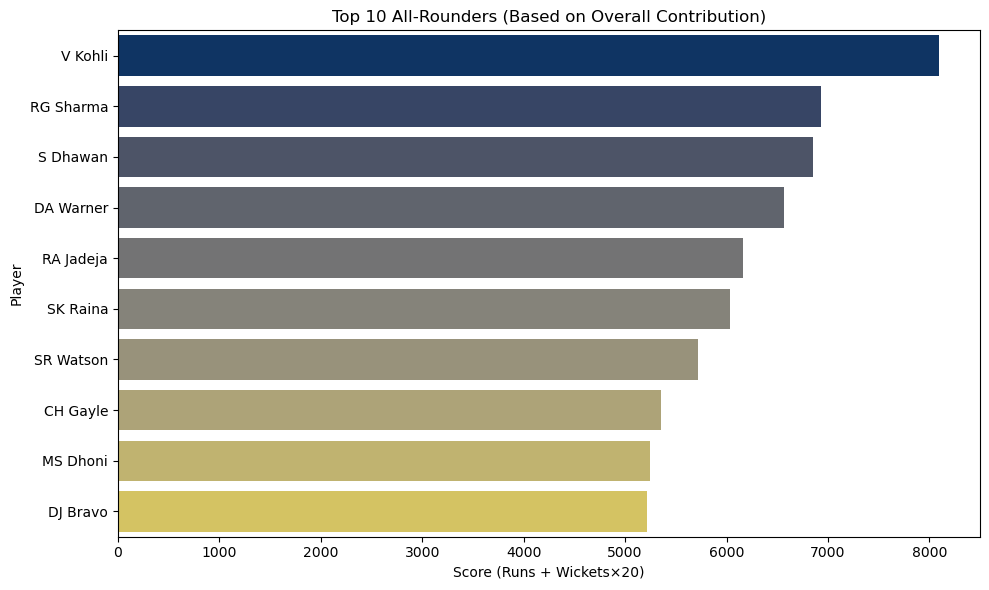

In [31]:
# Combine runs and wickets per player
batter_runs = deliveries.groupby('batter')['batsman_runs'].sum()
bowler_wickets = wickets['bowler'].value_counts()

# Create a DataFrame
all_rounders = pd.DataFrame({
    'runs': batter_runs,
    'wickets': bowler_wickets
}).fillna(0)

# Add a weighted score (you can tweak the formula)
all_rounders['contribution'] = all_rounders['runs'] + all_rounders['wickets'] * 20

# Top 10 all-rounders
top_allrounders = all_rounders.sort_values('contribution', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_allrounders['contribution'], y=top_allrounders.index, palette='cividis')
plt.title('Top 10 All-Rounders (Based on Overall Contribution)')
plt.xlabel('Score (Runs + Wickets×20)')
plt.ylabel('Player')
plt.tight_layout()
plt.show()


## 🏟️ Venue and Toss Impact Analysis

### 🔹 Venues with Most Matches
This chart shows the top venues where most IPL matches have been played.

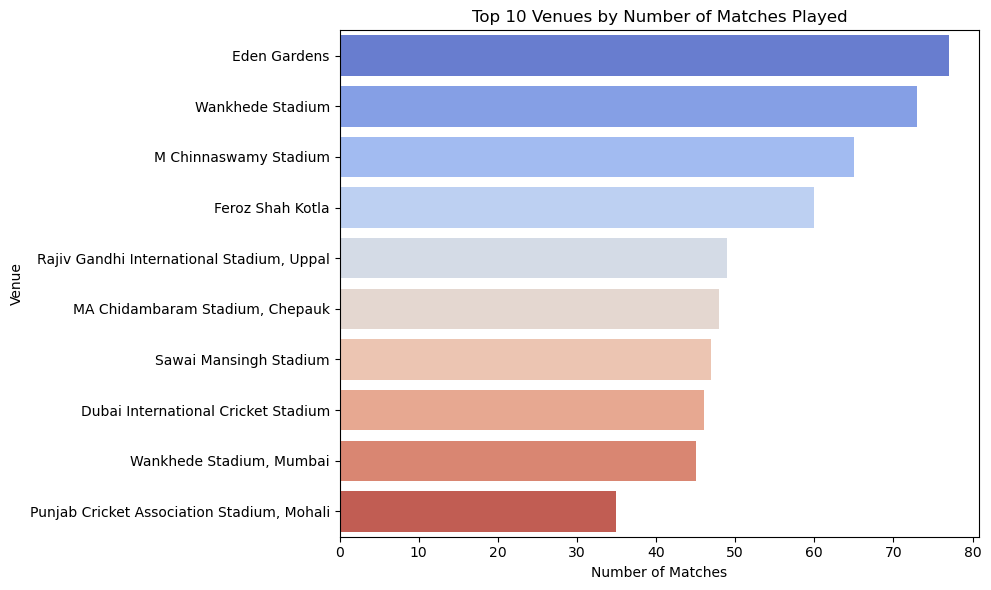

In [46]:
venue_counts = matches['venue'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=venue_counts.values, y=venue_counts.index, palette='coolwarm')
plt.title('Top 10 Venues by Number of Matches Played')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.tight_layout()
plt.show()


### 🔹 Toss Winner and Match Outcome
We analyze how often the team that wins the toss also ends up winning the match.

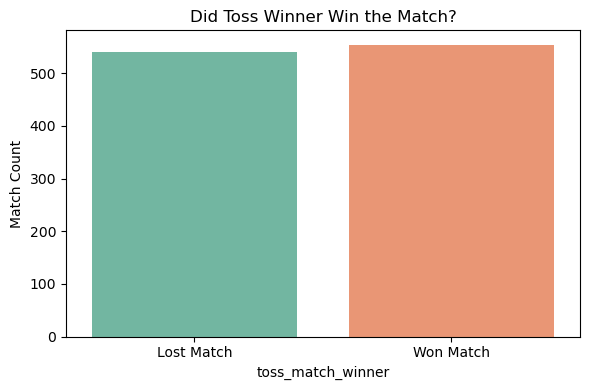

In [48]:
# Create a new column to check if toss winner also won the match
matches['toss_match_winner'] = matches['toss_winner'] == matches['winner']
toss_win_counts = matches['toss_match_winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=toss_win_counts.index, y=toss_win_counts.values, palette='Set2')
plt.xticks([0, 1], ['Lost Match', 'Won Match'])
plt.title('Did Toss Winner Win the Match?')
plt.ylabel('Match Count')
plt.tight_layout()
plt.show()



### 🔹 Toss Decision Preference
Displays how many teams choose to bat or field after winning the toss.

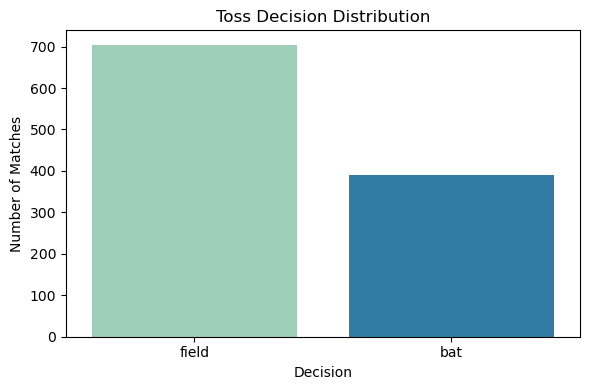

In [50]:
toss_decision = matches['toss_decision'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=toss_decision.index, y=toss_decision.values, palette='YlGnBu')
plt.title('Toss Decision Distribution')
plt.xlabel('Decision')
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.show()


##  Head-to-Head Comparison: MI vs CSK

This bar chart compares how many times each team has won when playing against the other.



In [55]:
team1 = 'Mumbai Indians'
team2 = 'Chennai Super Kings'

# Filter matches where both teams played
head_to_head_matches = matches[((matches['team1'] == team1) & (matches['team2'] == team2)) |
                               ((matches['team1'] == team2) & (matches['team2'] == team1))]

# Get only match_ids
head_to_head_ids = head_to_head_matches['id'].unique()


### Batting Performance
Bar chart showing total runs scored by each team in head-to-head matches.

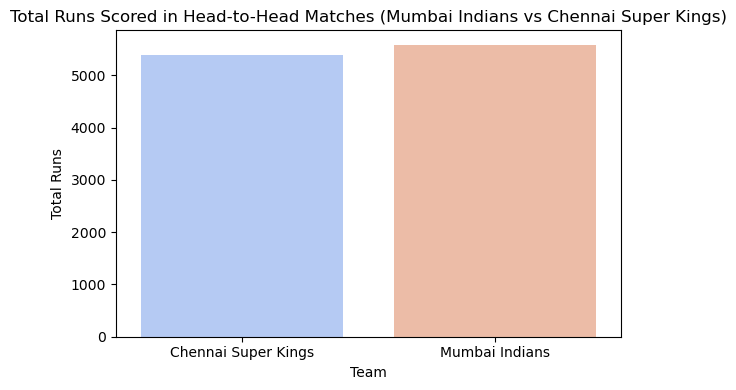

In [57]:
# Filter deliveries for these matches
h2h_deliveries = deliveries[deliveries['match_id'].isin(head_to_head_ids)]

# Batting runs per team
batting_stats = h2h_deliveries.groupby('batting_team')['batsman_runs'].sum()

# Visualize
plt.figure(figsize=(6,4))
sns.barplot(x=batting_stats.index, y=batting_stats.values, palette='coolwarm')
plt.title(f'Total Runs Scored in Head-to-Head Matches ({team1} vs {team2})')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.tight_layout()
plt.show()


In [64]:
### Bowling Performance
Total number of wickets taken by each team in head-to-head matches.

SyntaxError: invalid syntax (3020966481.py, line 2)

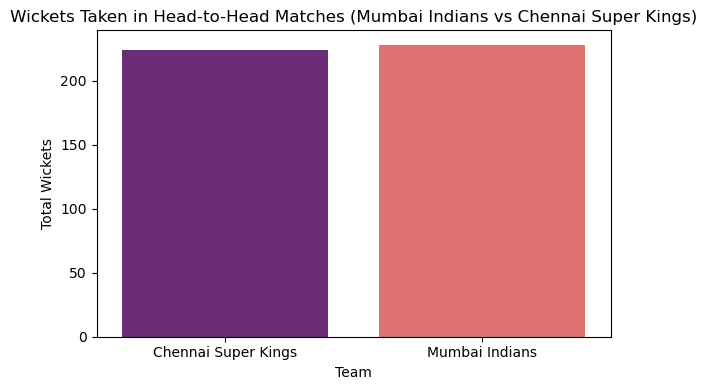

In [59]:
# Filter where wicket actually fell
wickets = h2h_deliveries[h2h_deliveries['is_wicket'] == 1]

# Wickets per bowling team
bowling_stats = wickets.groupby('bowling_team').size()

# Visualize
plt.figure(figsize=(6,4))
sns.barplot(x=bowling_stats.index, y=bowling_stats.values, palette='magma')
plt.title(f'Wickets Taken in Head-to-Head Matches ({team1} vs {team2})')
plt.xlabel('Team')
plt.ylabel('Total Wickets')
plt.tight_layout()
plt.show()


In [66]:
###  Win Ratio
Shows which team has won more matches in their encounters.

SyntaxError: invalid syntax (2262101585.py, line 2)

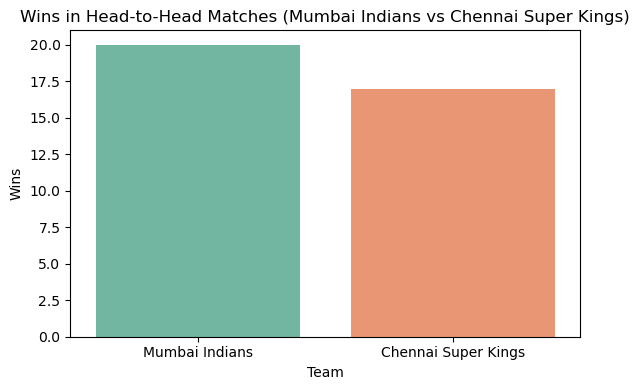

In [61]:
win_counts = head_to_head_matches['winner'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=win_counts.index, y=win_counts.values, palette='Set2')
plt.title(f'Wins in Head-to-Head Matches ({team1} vs {team2})')
plt.xlabel('Team')
plt.ylabel('Wins')
plt.tight_layout()
plt.show()


##  Machine Learning Model: Match Win Prediction

- Used Random Forest Classifier on team1, team2, toss winner, toss decision, and venue.
- Model predicts the winning team.


We’ll predict the winner of a match using:

Toss winner

Toss decision

Venue

Team1 & Team2

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the model: {accuracy:.2f}")


Accuracy of the model: 0.43


In [90]:
from sklearn.model_selection import train_test_split

X = ml_df.drop('winner', axis=1)
y = ml_df['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #X_train and y_train: used to train the model
#X_test and y_test: used to evaluate how well the model performs on new data


In [94]:
import pandas as pd

sample_input_df = pd.DataFrame([[2, 6, 6, 1, 15]], columns=['team1', 'team2', 'toss_winner', 'toss_decision', 'venue'])
prediction = model.predict(sample_input_df)

print("Predicted Winner:", encoder.inverse_transform(prediction))


Predicted Winner: ['Kings XI Punjab']
